In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
ders=pd.read_csv("1-studyhours.csv")

In [18]:
ders.head()


,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


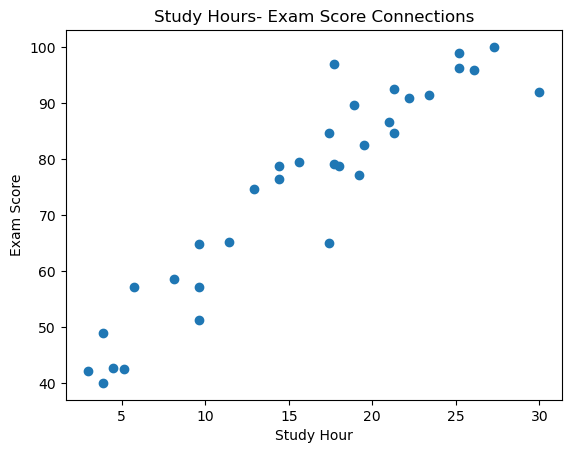

In [19]:
plt.scatter(ders["Study Hours"],ders["Exam Score"])
plt.xlabel("Study Hour")
plt.ylabel("Exam Score")
plt.title("Study Hours- Exam Score Connections")
plt.show()

In [20]:
X=ders[["Study Hours"]]
y=ders["Exam Score"]

In [21]:
type(y)

pandas.core.series.Series

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=14)

In [25]:
X_train.head()



,Study Hours
21,8.1
12,30.0
0,3.9
4,14.4
16,5.7


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
X_test

array([[ 1.30343053],
       [ 0.34066934],
       [-0.69911274],
       [-0.27549782],
       [ 1.30343053],
       [ 0.3021589 ],
       [ 0.80279471]])

In [30]:
X_train

array([[-0.89166498],
       [ 1.91959769],
       [-1.43081124],
       [-0.08294558],
       [-1.19974856],
       [ 0.37917979],
       [ 1.57300366],
       [ 1.41896187],
       [-0.69911274],
       [-0.69911274],
       [-1.35379035],
       [ 0.57173203],
       [-0.46805005],
       [ 0.07109621],
       [-1.54634258],
       [ 1.07236785],
       [-0.08294558],
       [ 0.3021589 ],
       [-1.27676945],
       [ 0.53322158],
       [-1.43081124],
       [ 0.49471113],
       [ 0.91832606],
       [ 0.80279471],
       [ 0.76428427],
       [ 0.34066934]])

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regression=LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [3]:
regression.coef_

NameError: name 'regression' is not defined

In [39]:
regression.intercept_


np.float64(37.25651403197782)

In [43]:
regression.predict(scaler.transform([[100]]))

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.1373313])

In [74]:
regression.predict(X_test)

array([76.95496253, 47.52335416, 59.15910631, 77.63941854, 85.16843463,
       76.95496253, 63.26584236])

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [77]:
re_pred_y_test=regression.predict(X_test)

In [78]:
mse=mean_absolute_error(y_test,re_pred_y_test)
mae=mean_squared_error(y_test,re_pred_y_test)
rmse=np.sqrt(mse)
print(mse,mae,rmse)

7.02982356289129 87.35985883981634 2.651381444245865


In [80]:
r2_degeri = r2_score(y_test, re_pred_y_test)

In [81]:
print("R² =", r2_degeri)

R² = 0.7182325867721207


In [82]:
1 - ( 1-r2_degeri) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )

0.6618791041265448